#  Logistic Regression Using R

In [99]:
setwd("D:/Bdat_Course_Material/Semister 2/Business Intelligence/Assignment1")
Data = read.csv(file = "voice.csv")

In [100]:
nrow(Data)

[1] 3168

In [101]:
head(Data)

meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0.05978098,0.06424127,0.03202691,0.015071489,0.09019344,0.07512195,12.863462,274.402906,0.8933694,0.4919178,...,0.05978098,0.08427911,0.01570167,0.2758621,0.007812500,0.0078125,0.0078125,0.0000000,0.00000000,male
0.06600874,0.06731003,0.04022873,0.019413867,0.09266619,0.07325232,22.423285,634.613855,0.8921932,0.5137238,...,0.06600874,0.10793655,0.01582591,0.2500000,0.009014423,0.0078125,0.0546875,0.0468750,0.05263158,male
0.07731550,0.08382942,0.03671846,0.008701057,0.13190802,0.12320696,30.757155,1024.927705,0.8463891,0.4789050,...,0.07731550,0.09870626,0.01565558,0.2711864,0.007990057,0.0078125,0.0156250,0.0078125,0.04651163,male
0.15122809,0.07211059,0.15801119,0.096581728,0.20795525,0.11137352,1.232831,4.177296,0.9633225,0.7272318,...,0.15122809,0.08896485,0.01779755,0.2500000,0.201497396,0.0078125,0.5625000,0.5546875,0.24711908,male
0.13512039,0.07914610,0.12465623,0.078720218,0.20604493,0.12732471,1.101174,4.333713,0.9719551,0.7835681,...,0.13512039,0.10639784,0.01693122,0.2666667,0.712812500,0.0078125,5.4843750,5.4765625,0.20827389,male
0.13278641,0.07955687,0.11908985,0.067957993,0.20959160,0.14163361,1.932562,8.308895,0.9631813,0.7383070,...,0.13278641,0.11013192,0.01711230,0.2539683,0.298221983,0.0078125,2.7265625,2.7187500,0.12515964,male


In [102]:
Data$label <- ifelse(Data$label == "male", 1, 0)
Data$label <- factor(Data$label, levels = c(0, 1))

In [103]:
RowNumbers = sample(1:nrow(Data), 0.8*nrow(Data))
head(RowNumbers)


[1] 1766 1334 2944 1057 1573 2148

In [104]:
VoiceTrainData = Data[RowNumbers, ]
VoiceTestData = Data[-RowNumbers, ]
nrow(VoiceTrainData)
nrow(VoiceTestData)

[1] 2534

[1] 634

In [105]:
colnames(Data)

[1] "meanfreq" "sd"       "median"   "Q25"      "Q75"      "IQR"     
 [7] "skew"     "kurt"     "sp.ent"   "sfm"      "mode"     "centroid"
[13] "meanfun"  "minfun"   "maxfun"   "meandom"  "mindom"   "maxdom"  
[19] "dfrange"  "modindx"  "label"

In [106]:
logitMod <- glm(label ~ meanfreq + sd + median + Q25 + Q75 + IQR + skew + kurt + sp.ent + sfm + mode + centroid +
                meanfun + minfun + maxfun + meandom + mindom + maxdom + dfrange + modindx, data=VoiceTrainData,
                family=binomial)

In [107]:
summary(logitMod)


Call:
glm(formula = label ~ meanfreq + sd + median + Q25 + Q75 + IQR + 
    skew + kurt + sp.ent + sfm + mode + centroid + meanfun + 
    minfun + maxfun + meandom + mindom + maxdom + dfrange + modindx, 
    family = binomial, data = VoiceTrainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.3002  -0.0286   0.0045   0.1045   4.2853  

Coefficients: (3 not defined because of singularities)
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -2.210e+01  1.151e+01  -1.920 0.054848 .  
meanfreq     2.705e-01  5.246e+01   0.005 0.995886    
sd           4.180e+01  3.997e+01   1.046 0.295649    
median      -4.894e+00  1.476e+01  -0.332 0.740141    
Q25         -5.158e+01  1.369e+01  -3.768 0.000165 ***
Q75          5.189e+01  2.283e+01   2.273 0.023051 *  
IQR                 NA         NA      NA       NA    
skew        -1.665e-02  2.308e-01  -0.072 0.942480    
kurt        -1.460e-03  6.825e-03  -0.214 0.830566    
sp.ent       4.846e+01  1.265

In [108]:
predicted <- predict(logitMod, VoiceTestData, type="response")
predicted

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = if (type == :
"prediction from a rank-deficient fit may be misleading"

16           31           37           39           42           45 
9.968440e-01 9.999934e-01 4.201567e-02 1.078142e-01 9.999673e-01 9.978003e-01 
          46           47           51           56           57           62 
9.986634e-01 9.999675e-01 9.980228e-01 9.970508e-01 9.975515e-01 9.661229e-01 
          75           80           81           90           95          105 
9.999699e-01 1.458756e-02 5.326519e-01 9.999543e-01 9.998955e-01 9.975778e-01 
         106          108          115          116          133          142 
9.994113e-01 9.987106e-01 9.963621e-01 9.897086e-01 9.798527e-01 9.991143e-01 
         143          144          157          163          165          167 
9.999934e-01 9.994510e-01 9.999871e-01 9.999873e-01 9.999277e-01 9.959766e-01 
         175          176          177          181          188          193 
9.999575e-01 9.998317e-01 9.998398e-01 9.972611e-01 2.710529e-01 9.160098e-01 
         194          203          206          207          208          216 
9.973374e-01 9.965689e-01 8.191429e-01 9.237270e-01 8.947670e-01 9.920401e-01 
         217          222          225          238          239          255 
9.793673e-01 9.968803e-01 9.891474e-01 9.995570e-01 9.955650e-01 9.897507e-01 
         261          272          273          278          281          285 
7.439984e-01 9.665530e-01 9.558232e-01 9.957574e-01 9.749736e-01 9.984335e-01 
         286          288          293          295          309          319 
9.662180e-01 9.575509e-01 9.726228e-01 9.886848e-01 9.791556e-01 9.940846e-01 
         321          342          347          361          363          365 
9.989754e-01 9.858377e-01 9.919649e-01 9.963685e-01 9.994046e-01 9.910472e-01 
         369          388          390          396          398          399 
9.952704e-01 9.902056e-01 9.901763e-01 9.946099e-01 9.983605e-01 9.986909e-01 
         406          410          417          420          422          425 
9.978021e-01 9.922490e-01 9.965374e-01 9.978079e-01 9.990641e-01 9.870679e-01 
         429          431          434          435          438          440 
9.946815e-01 9.973283e-01 9.947620e-01 9.977662e-01 9.980312e-01 9.846969e-01 
         442          443          450          451          456          461 
9.954433e-01 9.918954e-01 8.863287e-01 9.947759e-01 9.993436e-01 9.679496e-01 
         464          473          479          492          497          499 
9.998940e-01 9.913039e-01 9.509383e-01 9.456098e-01 8.722933e-01 9.912285e-01 
         501          502          503          514          518          519 
9.984966e-01 9.697887e-01 9.592776e-01 9.460426e-01 9.994041e-01 9.986817e-01 
         520          523          527          531          543          546 
9.987298e-01 9.993510e-01 9.999375e-01 9.921634e-01 9.999761e-01 9.999731e-01 
         552          554          564          567          574          577 
9.998536e-01 9.999332e-01 9.955477e-01 9.953418e-01 9.978889e-01 9.921294e-01 
         584          591          594          604          605          611 
9.821982e-01 6.581854e-01 8.165252e-01 9.999104e-01 9.992431e-01 9.760625e-01 
         625          628          629          630          634          635 
9.998367e-01 9.699449e-01 9.998528e-01 9.982120e-01 9.856397e-01 9.994454e-01 
         643          645          647          648          650          652 
1.531433e-01 2.472727e-02 2.978040e-03 5.997175e-05 1.119578e-04 8.805018e-01 
         659          662          663          667          669          673 
9.989346e-01 9.999522e-01 9.983548e-01 9.951674e-01 9.991081e-01 9.983241e-01 
         679          683          697          701          711          723 
9.999362e-01 9.960353e-01 9.991350e-01 9.954207e-01 9.987571e-01 9.992736e-01 
         725          735          755          756          757          758 
9.961015e-01 9.997076e-01 9.957708e-01 9.997328e-01 9.998732e-01 9.971459e-01 
         759          761          762          765         

## confusion matrix

In [109]:
#confusion matrix
table(VoiceTestData$label,predicted>0.5)

   
    FALSE TRUE
  0   322    9
  1    11  292

In [110]:
y_predicted <- ifelse(predicted > 0.5, 1, 0)
y_pred <- factor(y_predicted, levels=c(0, 1))
y_act <- VoiceTestData$label

## Accuracy of model

In [111]:
mean(y_pred == y_act)

[1] 0.9684543

In [112]:
VoiceTrainData_X = subset(VoiceTrainData, select = -c(label) )

In [113]:
keeps <- c("label")
VoiceTrainData_y = VoiceTrainData[keeps]

In [114]:
install.packages("Hmisc") # Only run on first use
library(Hmisc)

Warning message:
"package 'Hmisc' is in use and will not be installed"

## Correlation Matrix

In [115]:
ccs <- as.matrix(VoiceTrainData_X)
correlated = rcorr(ccs, type="pearson")
correlated

         meanfreq    sd median   Q25   Q75   IQR  skew  kurt sp.ent   sfm  mode
meanfreq     1.00 -0.74   0.93  0.91  0.74 -0.63 -0.33 -0.32  -0.61 -0.79  0.68
sd          -0.74  1.00  -0.57 -0.85 -0.16  0.88  0.31  0.34   0.73  0.85 -0.52
median       0.93 -0.57   1.00  0.78  0.73 -0.49 -0.28 -0.26  -0.50 -0.66  0.68
Q25          0.91 -0.85   0.78  1.00  0.48 -0.87 -0.32 -0.35  -0.66 -0.78  0.58
Q75          0.74 -0.16   0.73  0.48  1.00  0.00 -0.22 -0.16  -0.17 -0.37  0.49
IQR         -0.63  0.88  -0.49 -0.87  0.00  1.00  0.24  0.31   0.66  0.68 -0.39
skew        -0.33  0.31  -0.28 -0.32 -0.22  0.24  1.00  0.98  -0.18  0.09 -0.44
kurt        -0.32  0.34  -0.26 -0.35 -0.16  0.31  0.98  1.00  -0.11  0.12 -0.41
sp.ent      -0.61  0.73  -0.50 -0.66 -0.17  0.66 -0.18 -0.11   1.00  0.87 -0.32
sfm         -0.79  0.85  -0.66 -0.78 -0.37  0.68  0.09  0.12   0.87  1.00 -0.48
mode         0.68 -0.52   0.68  0.58  0.49 -0.39 -0.44 -0.41  -0.32 -0.48  1.00
centroid     1.00 -0.74   0.93  0.91  0.

## Heat map of Correlation matrix

In [116]:
cormat <- round(cor(ccs),2)
library(reshape2)
melted_cormat <- melt(cormat)
head(melted_cormat)

Var1,Var2,value
meanfreq,meanfreq,1.00
sd,meanfreq,-0.74
median,meanfreq,0.93
Q25,meanfreq,0.91
Q75,meanfreq,0.74
IQR,meanfreq,-0.63


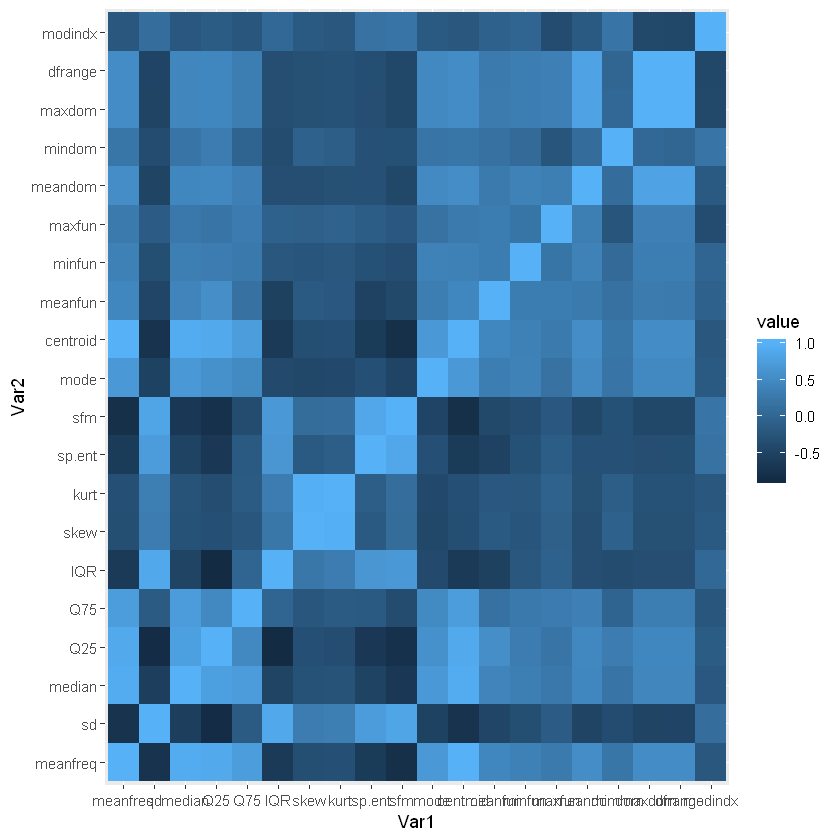

In [117]:
library(ggplot2)
ggplot(data = melted_cormat, aes(x=Var1, y=Var2, fill=value)) + 
  geom_tile()

## Removing highly correllated columns and applying regression again

In [118]:
VoiceTrainData_Modified = subset(VoiceTrainData, select = -c(skew,maxdom,centroid,sd,meanfreq,IQR) )
VoiceTestData_Modified = subset(VoiceTestData, select = -c(skew,maxdom,centroid,sd,meanfreq,IQR) )
nrow(VoiceTrainData_Modified)
nrow(VoiceTestData_Modified)

[1] 2534

[1] 634

In [119]:
logitMod_Modified <- glm(label ~ median + Q25 + Q75   + kurt + sp.ent + sfm + mode  +
                meanfun + minfun + maxfun + meandom + mindom  + dfrange + modindx, data=VoiceTrainData,
                family=binomial)

In [120]:
summary(logitMod_Modified)


Call:
glm(formula = label ~ median + Q25 + Q75 + kurt + sp.ent + sfm + 
    mode + meanfun + minfun + maxfun + meandom + mindom + dfrange + 
    modindx, family = binomial, data = VoiceTrainData)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-3.0744  -0.0306   0.0041   0.1019   4.3286  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.681e+01  8.316e+00  -2.022 0.043178 *  
median      -4.663e+00  6.948e+00  -0.671 0.502167    
Q25         -6.042e+01  6.828e+00  -8.848  < 2e-16 ***
Q75          6.167e+01  7.712e+00   7.997 1.27e-15 ***
kurt        -1.990e-03  1.641e-03  -1.213 0.225077    
sp.ent       4.405e+01  1.004e+01   4.387 1.15e-05 ***
sfm         -1.237e+01  2.364e+00  -5.234 1.66e-07 ***
mode         3.332e+00  2.432e+00   1.370 0.170802    
meanfun     -1.736e+02  1.039e+01 -16.718  < 2e-16 ***
minfun       3.923e+01  1.078e+01   3.638 0.000275 ***
maxfun       1.725e+00  7.466e+00   0.231 0.817269    
meandom     -1

## confusion matrix

In [121]:
predicted_Modified <- predict(logitMod_Modified, VoiceTestData_Modified, type="response")
#confusion matrix
table(VoiceTestData_Modified$label,predicted_Modified>0.5)

   
    FALSE TRUE
  0   325    6
  1    11  292

In [122]:
y_predicted_Modified <- ifelse(predicted_Modified > 0.5, 1, 0)
y_pred_Modified <- factor(y_predicted_Modified, levels=c(0, 1))
y_act_Modified <- VoiceTestData_Modified$label

## Accuracy

In [123]:
mean(y_pred_Modified == y_act_Modified)

[1] 0.9731861